In [1]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
train=pd.read_csv("featured_train.csv")
test=pd.read_csv("featured_test.csv")

In [3]:
train.head()

,Unnamed: 0,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,284,0,664,4,5592,4,1,0,1,2540
1,1,57,1,880,14,473,8,1,2,2,422
2,2,375,0,715,10,2901,4,1,0,1,1639
3,3,392,1,0,6,4227,3,1,2,0,670
4,4,265,0,0,9,627,1,0,2,1,865


In [4]:
test.head()

,Unnamed: 0,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,403,1,66,13,1460,4,1,0,1
1,1,223,4,1714,4,965,7,1,1,1
2,2,337,1,4042,11,4076,3,1,2,0
3,3,156,1,388,13,2522,7,1,1,1
4,4,316,2,4423,4,3972,0,1,2,3


In [5]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,0,664,4,5592,4,1,0,1,2540
1,57,1,880,14,473,8,1,2,2,422
2,375,0,715,10,2901,4,1,0,1,1639
3,392,1,0,6,4227,3,1,2,0,670
4,265,0,0,9,627,1,0,2,1,865


In [7]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,403,1,66,13,1460,4,1,0,1
1,223,4,1714,4,965,7,1,1,1
2,337,1,4042,11,4076,3,1,2,0
3,156,1,388,13,2522,7,1,1,1
4,316,2,4423,4,3972,0,1,2,3


In [8]:
Test=pd.read_csv("Test.csv")
Test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


# Model Building

In [9]:
# Spliting dataset
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
#import modules

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Linear Regression

In [12]:
li_model = linear_model.LinearRegression()
li_model.fit(X_train, y_train)
y_pred =li_model.predict(X_test)

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

Mean Absolute Error: 480.15853337914683
Mean Squared Error: 359389.6996107479
Root Mean Squared Error: 599.4912006116086
r2_score: 0.5632725370352125


In [14]:
li_result=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
li_result.head(10)

,Actual Value,Predicted Value
7503,1398,839.191679
2957,343,643.296664
7031,363,995.420283
1084,3199,2615.498332
856,1796,1911.700121
4304,773,882.883369
2132,2882,2811.791480
1385,1835,1923.766408
5239,1530,1540.429149
6516,1522,2418.463484


<AxesSubplot: >

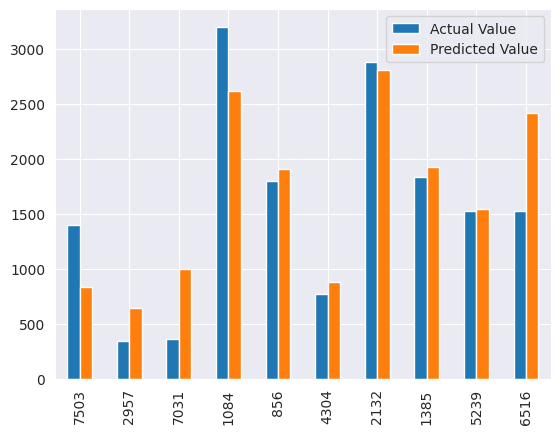

In [15]:
li_graph = li_result.head(10)
li_graph.plot(kind='bar')

# Random Forest

In [23]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
rf_model.fit(X_train, y_train) 
y_pred = rf_model.predict(X_test)

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:',r2_score(y_test,y_pred))

Mean Absolute Error: 416.7797360703812
Mean Squared Error: 300215.57791865105
Root Mean Squared Error: 547.9193169789244
r2_score: 0.6351804522251843


In [25]:
rf_result=pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
rf_result.head(10)

,Actual Value,Predicted Value
7503,1398,667.57
2957,343,780.99
7031,363,646.28
1084,3199,2603.50
856,1796,1672.91
4304,773,412.62
2132,2882,3025.21
1385,1835,1252.49
5239,1530,1044.36
6516,1522,2088.99


# Applying model in  test dataset

In [26]:
predictions = rf_model.predict(test)

In [27]:
# creating csv

output = pd.DataFrame({'Item_Identifier': Test['Item_Identifier'], 'Outlet_Identifier':Test['Outlet_Identifier'], 'Item_Outlet_Sales':predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# pickle File

In [28]:
import pickle
pickle.dump(rf_model, open('pickle.pkl','wb'))
model = pickle.load(open('pickle.pkl','rb'))